# ORIGEM DOS DADOS: 

Dados sobre o consumo de alcool com alunos de matematica e portugues do ensino medio em Portugal

- 30 aspectos da vida do aluno foram avaliados 
- 3 periodos de provas foram considerados (G1,G2 e G3)


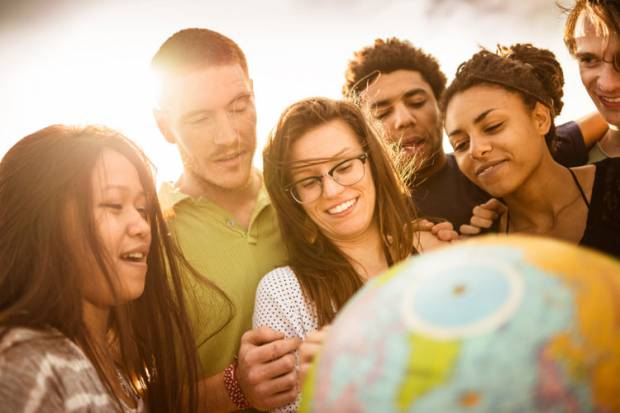

In [51]:
from IPython.display import Image
Image(filename="1.jpg")

### - Idade do estudantes entre idades de 15 e 22 anos
### - Que vivem em ambiente Urbano ou Rural
### - Ambiente familiar
### - Vida amorosa e Social
### - Acesso a internet
### - Saude 

In [52]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering

In [53]:
data_mat = pd.read_csv('student-mat.csv')
print("----------MAT----------")
print(data_mat.head())
print()
print()
data_port = pd.read_csv('student-por.csv')
print("----------PORT----------")
print(data_mat.head())
print()


----------MAT----------
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other ...   
3     GP   F   15       U     GT3       T     4     2   health  services ...   
4     GP   F   16       U     GT3       T     3     3    other     other ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


----------PORT----------
  school sex  age address famsize Pstatus  

### Observando a organizacao dos dados

In [54]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['DTypes'])
    summary_df['Nunique'] = df.nunique()
    summary_df['MissingValues'] = df.isnull().sum()
    summary_df['Count'] = df.count()
    summary_df['ZeroValues'] = (df==0).sum()
    
    print(summary_df)
    
    
#call function
print("----------Math data----------")
print(summary(data_mat))
print()
print()
print("----------Portuguese data----------")
print(summary(data_port))

----------Math data----------
            DTypes  Nunique  MissingValues  Count  ZeroValues
school      object        2              0    395           0
sex         object        2              0    395           0
age          int64        8              0    395           0
address     object        2              0    395           0
famsize     object        2              0    395           0
Pstatus     object        2              0    395           0
Medu         int64        5              0    395           3
Fedu         int64        5              0    395           2
Mjob        object        5              0    395           0
Fjob        object        5              0    395           0
reason      object        4              0    395           0
guardian    object        3              0    395           0
traveltime   int64        4              0    395           0
studytime    int64        4              0    395           0
failures     int64        4             

### Observando a distribuicao de dados

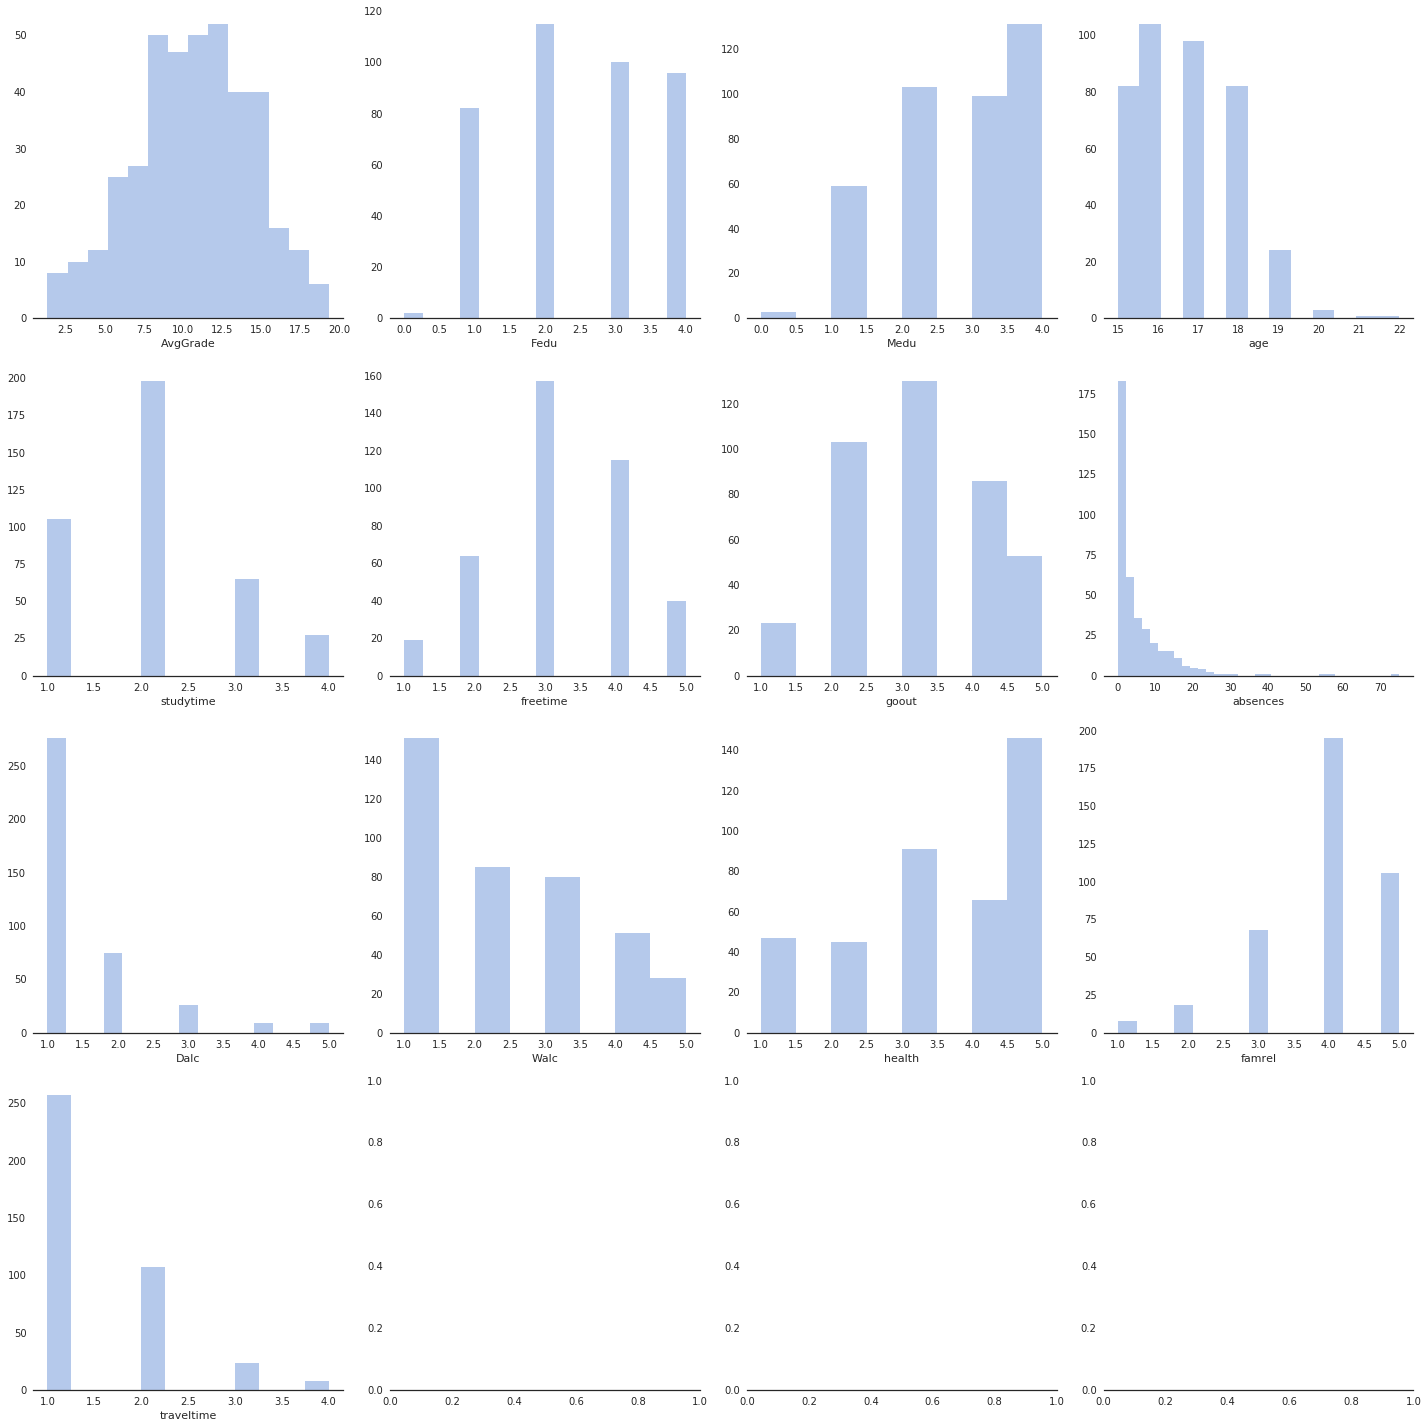

In [55]:
data_mat['AvgGrade'] = data_mat[['G1', 'G2', 'G3']].mean(axis=1)
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(4, 4, figsize=(20,20))
sns.despine(left=True)
sns.distplot(data_mat['AvgGrade'],  kde=False, color="b", ax=axes[0, 0])
# sns.distplot(data_mat['G3'],        kde=False, color="b", ax=axes[0, 1])
# sns.distplot(data_mat['G2'],        kde=False, color="b", ax=axes[0, 2])
# sns.distplot(data_mat['G1'],        kde=False, color="b", ax=axes[0, 3])
sns.distplot(data_mat['studytime'], kde=False, color="b", ax=axes[1, 0])
sns.distplot(data_mat['freetime'],  kde=False, color="b", ax=axes[1, 1])
sns.distplot(data_mat['goout'],     kde=False, color="b", ax=axes[1, 2])
sns.distplot(data_mat['absences'],  kde=False, color="b", ax=axes[1, 3])
sns.distplot(data_mat['Dalc'],      kde=False, color="b", ax=axes[2, 0])
sns.distplot(data_mat['Walc'],      kde=False, color="b", ax=axes[2, 1])
sns.distplot(data_mat['health'],    kde=False, color="b", ax=axes[2, 2])
sns.distplot(data_mat['famrel'],    kde=False, color="b", ax=axes[2, 3])
sns.distplot(data_mat['traveltime'],kde=False, color="b", ax=axes[3, 0])
sns.distplot(data_mat['age'],       kde=False, color="b", ax=axes[0, 3])
sns.distplot(data_mat['Medu'],      kde=False, color="b", ax=axes[0, 2])
sns.distplot(data_mat['Fedu'],      kde=False, color="b", ax=axes[0, 1])
plt.tight_layout()


In [ ]:
data_port['AvgGrade'] = data_port[['G1', 'G2', 'G3']].mean(axis=1)
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(4, 4, figsize=(20,20))
sns.despine(left=True)
sns.distplot(data_port['AvgGrade'],  kde=False, color="b", ax=axes[0, 0])
# sns.distplot(data_port['G3'],        kde=False, color="b", ax=axes[0, 1])
# sns.distplot(data_port['G2'],        kde=False, color="b", ax=axes[0, 2])
# sns.distplot(data_port['G1'],        kde=False, color="b", ax=axes[0, 3])
sns.distplot(data_port['studytime'], kde=False, color="b", ax=axes[1, 0])
sns.distplot(data_port['freetime'],  kde=False, color="b", ax=axes[1, 1])
sns.distplot(data_port['goout'],     kde=False, color="b", ax=axes[1, 2])
sns.distplot(data_port['absences'],  kde=False, color="b", ax=axes[1, 3])
sns.distplot(data_port['

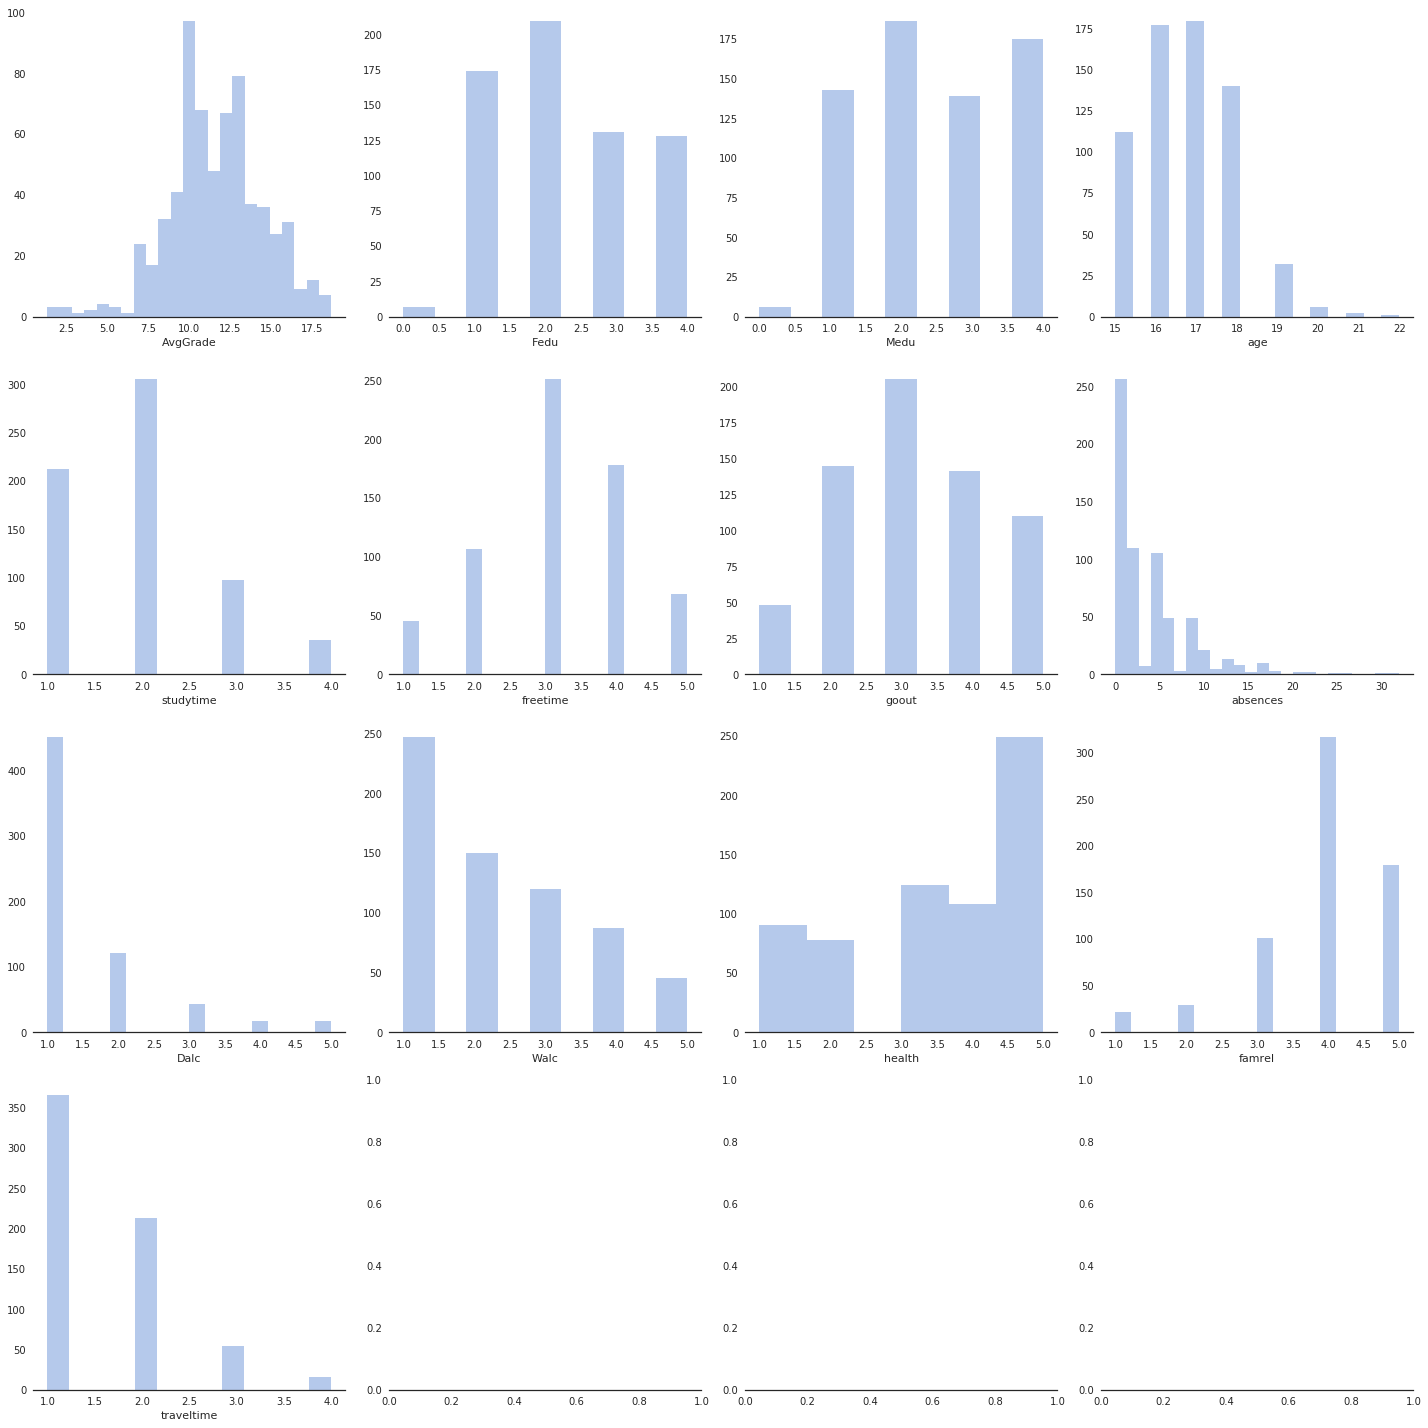

In [56]:
Dalc'],      kde=False, color="b", ax=axes[2, 0])
sns.distplot(data_port['Walc'],      kde=False, color="b", ax=axes[2, 1])
sns.distplot(data_port['health'],    kde=False, color="b", ax=axes[2, 2])
sns.distplot(data_port['famrel'],    kde=False, color="b", ax=axes[2, 3])
sns.distplot(data_port['traveltime'],kde=False, color="b", ax=axes[3, 0])
sns.distplot(data_port['age'],       kde=False, color="b", ax=axes[0, 3])
sns.distplot(data_port['Medu'],      kde=False, color="b", ax=axes[0, 2])
sns.distplot(data_port['Fedu'],      kde=False, color="b", ax=axes[0, 1])
plt.tight_layout()

### Criando subset e binarizando dados em formato 'objeto'

In [57]:
subdata_mat = data_mat.copy()
subdata_port = data_port.copy()
subdata_mat = subdata_mat[['failures','age','Medu','Fedu','higher','G1','G2','G3','romantic','goout','Dalc','Walc','freetime']]
subdata_port = subdata_port[['failures','age','Medu','Fedu','higher','G1','G2','G3','romantic','goout','Dalc','Walc','freetime']]
print (subdata_mat.head())
print()

binary_features = ['higher','romantic']

for column in binary_features:
    print(column,"-",subdata_mat[column].unique()) 
    #Checa em cada coluna os tipos de respostas.
print()
print("Transformando em dados binarios:")
print()
print()


for column in binary_features:
    if (column == 'address'):
        subdata_mat[column] = subdata_mat[column].apply(lambda x: 1 if (x=='U') else 0)
        subdata_port[column] = subdata_port[column].apply(lambda x: 1 if (x=='U') else 0)
    else:
        subdata_mat[column] = subdata_mat[column].apply(lambda x: 1 if (x=='yes') else 0)
        subdata_port[column] = subdata_port[column].apply(lambda x: 1 if (x=='yes') else 0)
    print(column,"-",subdata_mat[column].unique())
   
    


   failures  age  Medu  Fedu higher  G1  G2  G3 romantic  goout  Dalc  Walc  \
0         0   18     4     4    yes   5   6   6       no      4     1     1   
1         0   17     1     1    yes   5   5   6       no      3     1     1   
2         3   15     1     1    yes   7   8  10       no      2     2     3   
3         0   15     4     2    yes  15  14  15      yes      2     1     1   
4         0   16     3     3    yes   6  10  10       no      2     1     2   

   freetime  
0         3  
1         3  
2         3  
3         2  
4         3  

higher - ['yes' 'no']
romantic - ['no' 'yes']

Transformando em dados binarios:


higher - [1 0]
romantic - [0 1]


### Fazendo correlacoes

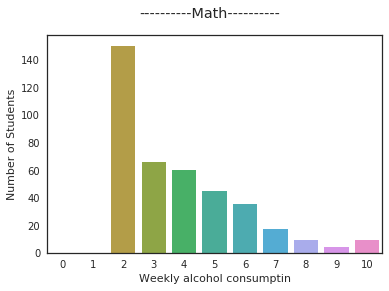

In [58]:
data_mat['Dalc'] = data_mat['Dalc'] + data_mat['Walc']
data_port['Dalc'] = data_port['Dalc'] + data_port['Walc']

def barplot(df,title):
    list = []
    for i in range(11):
        list.append(len(df[df.Dalc == i]))
    ax = sns.barplot(x = [0,1,2,3,4,5,6,7,8,9,10], y = list)
    plt.ylabel('Number of Students')
    plt.xlabel('Weekly alcohol consumptin')
    plt.suptitle(title)
    

barplot(data_mat, "----------Math----------")


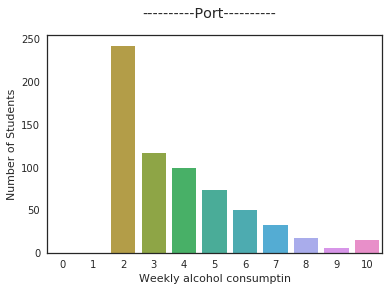

In [59]:
barplot(data_port,"----------Port----------")

### Criando subset e binarizando dados

### Avaliando consumo de alcol X notas nas avaliacoes

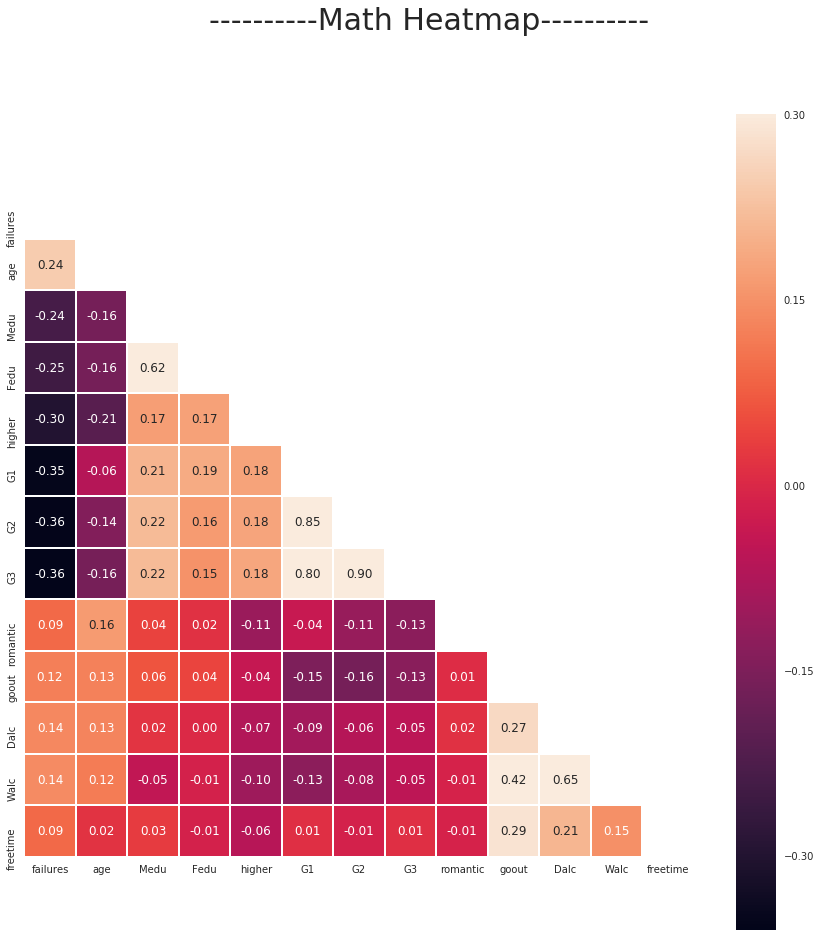

In [86]:
def heatmap(df,title):
    
    fig, axes = plt.subplots(figsize=(15, 15))
    corr = df.corr()            # Calculate correlation of param

    mask = np.zeros_like(corr)   # Create a array of zeros with the same shape as the df provided
    # print(mask)

    mask[np.triu_indices_from(mask)] = True    # set the index of the upper triangle of the array to True (1)
    # print(mask)

    with sns.axes_style("white"):
        sns.heatmap(corr, linewidths=1, 
                    annot=True, 
                    mask=mask, 
                    vmax=.3, 
                    square=True,
                   fmt=".2f",
                   cbar=True)  # mask: data will not be
        plt.suptitle(title, size="30")
        
        
heatmap(subdata_mat,"----------Math Heatmap----------")
print()


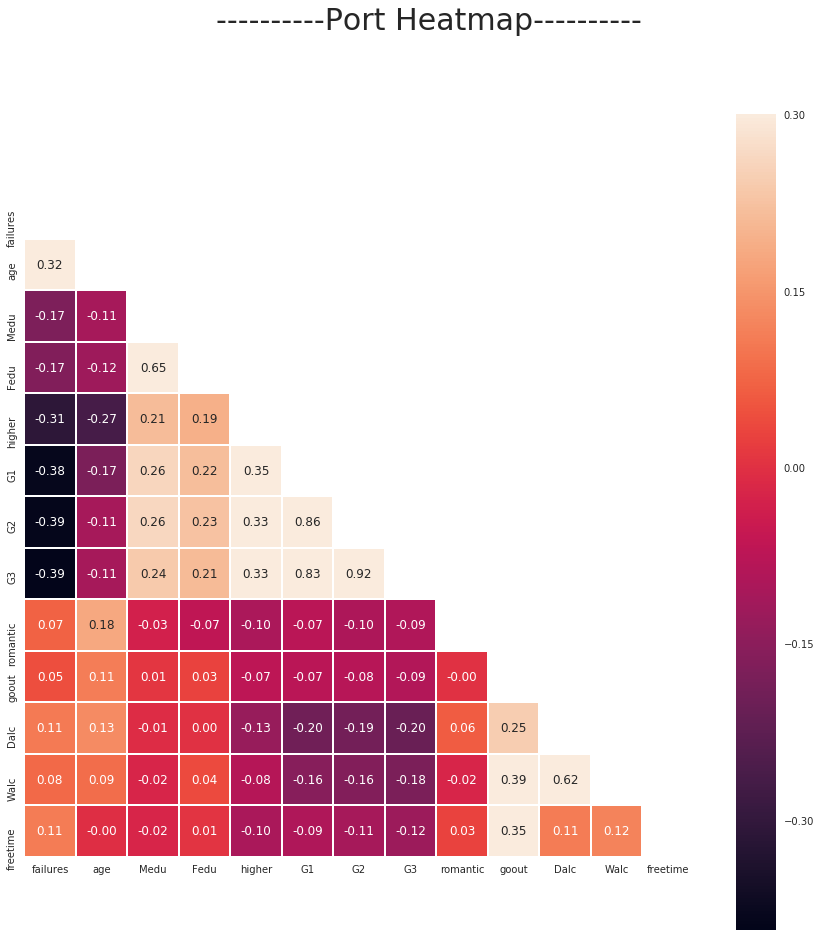

In [87]:
print()
heatmap(subdata_port,"----------Port Heatmap----------")

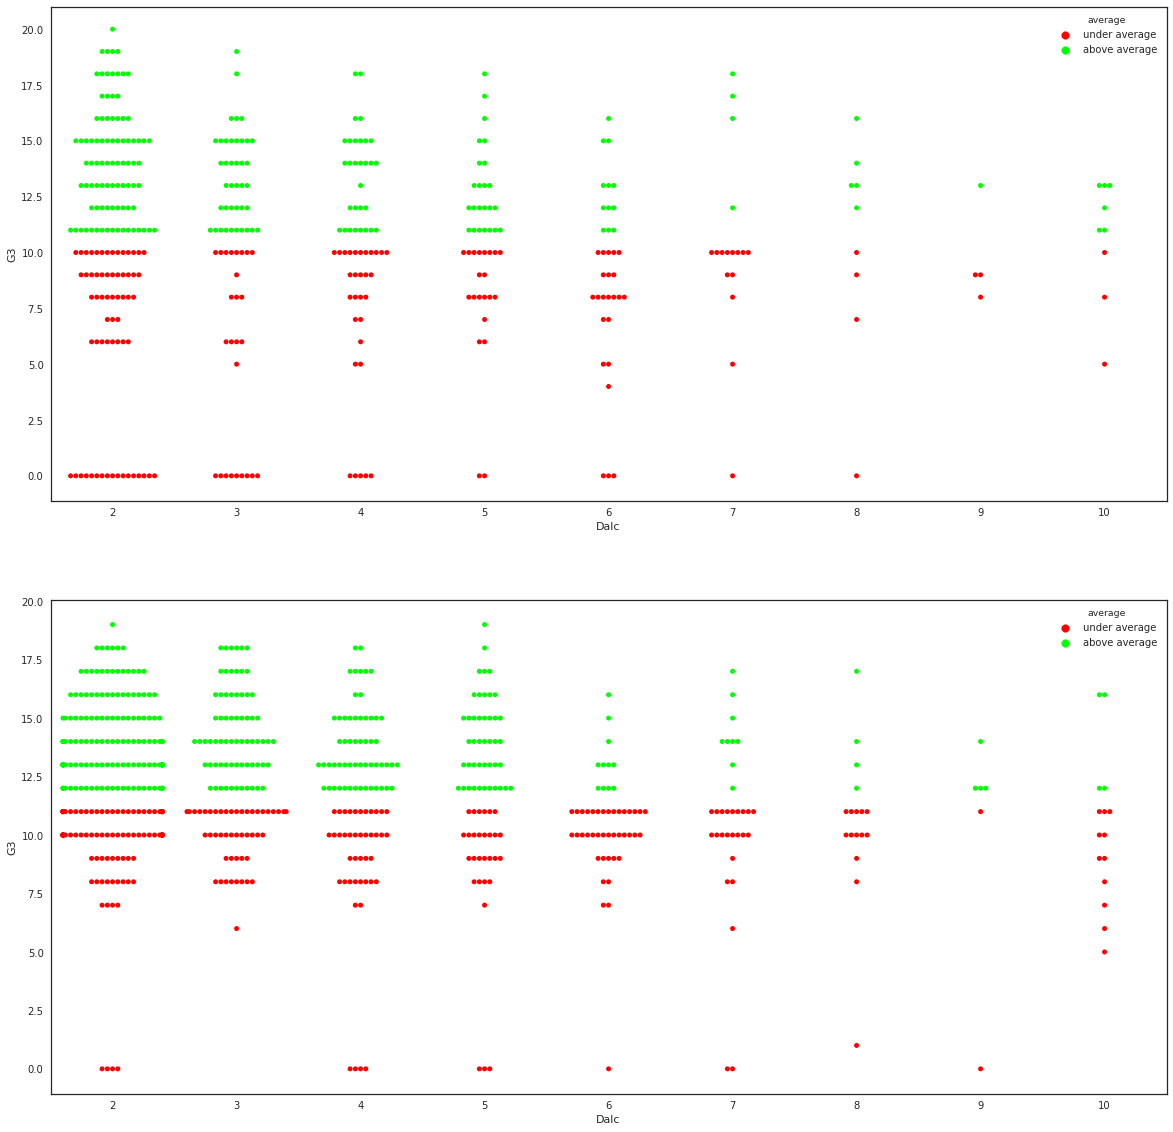

In [61]:
#Swarmplot comparando consumo semanal de alcool e notas finais dos alunos.
sns.set(style="white", palette="muted", color_codes=True) #Caracterizando o padrao do grafico
f, axes = plt.subplots(2, 1, figsize=(20,20)) #Criando uma figura de subplots agrupados em 4 linhas e 4 colunas, tamanho 20x20

plt.subplot(2, 1, 1)
ave = sum(data_mat.G3)/float(len(data_mat))
data_mat['ave_line'] = ave
data_mat['average'] = ['above average' if i > ave else 'under average' for i in data_mat.G3]
sns.swarmplot(x=data_mat['Dalc'], y = data_mat['G3'], hue = data_mat['average'],data= data_mat,palette={'above average':'lime', 'under average': 'red'})

plt.subplot(2,1,2)
avept = sum(data_port.G3)/float(len(data_port))
data_port['ave_line'] = avept
data_port['average'] = ['above average' if i > avept else 'under average' for i in data_port.G3]
sns.swarmplot(x=data_port['Dalc'], y = data_port['G3'], hue = data_port['average'],data= data_port,palette={'above average':'lime', 'under average': 'red'})

### PCA e regressao linear

original shape: (395, 2)
transformed shape: (395, 1)


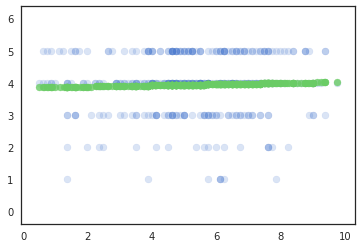

In [68]:
def AddFinalGrade(data):
    data.eval('final_grade = (((G1+G2)/2) + G3)/4', inplace=True)
    return data

def ProblemsProbability(data):
    target = data.query('(failures >0 or final_grade < 5 ) and famrel < 4' )
    #PCA as dimensionality reduction
    print (f"Probabilidade de alunos que reprovaram ou vao reprovar e possivelmente tem problemas com a familia {target.shape[0]/data.shape[0]: .02f}")
    
def PCA_plot(X):
    
    pca = PCA(n_components =1)
    pca.fit(X)
    X_pca = pca.transform(X)
    print ("original shape:", X.shape)
    print ("transformed shape:", X_pca.shape)
    
    X_new = pca.inverse_transform(X_pca)
    plt.scatter(X[:,0], X[:,1], alpha=0.2)
    plt.scatter(X_new[:,0], X_new[:,1], alpha=0.8)
    plt.axis('equal')

def RegressionFunction(x,y):
    model = LinearRegression(fit_intercept=True)

    model.fit(x[:,np.newaxis], y )

    xfit = np.linspace(0,10,1000)
    yfit = model.predict(xfit[:, np.newaxis])

    plt.scatter(x,y)
    plt.plot (xfit, yfit)
    
data_mat = AddFinalGrade(data_mat)
data_port = AddFinalGrade(data_port)
#x = data_mat['G3']
x = data_mat['final_grade']
y = data_mat['famrel']
data_scatter_mat = np.column_stack((x, y)) 



PCA_plot(data_scatter_mat)
# RegressionFunction(x,y)

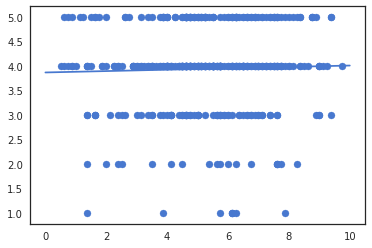

In [63]:
RegressionFunction(x,y) #Matematica

original shape: (649, 2)
transformed shape: (649, 1)


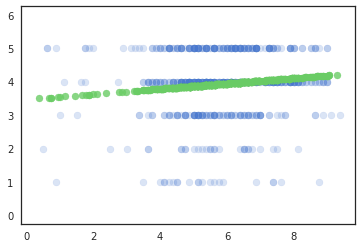

In [69]:

#x = data_port['G3']
x = data_port['final_grade']
y = data_port['famrel']
data_scatter_port = np.column_stack((x, y)) 


PCA_plot(data_scatter_port)


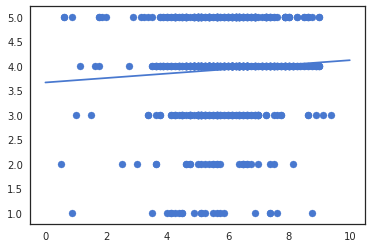

In [65]:
RegressionFunction(x,y) #Portugues

In [66]:
ProblemsProbability(data_mat)

Probabilidade de alunos que reprovaram ou vao reprovar e possivelmente tem problemas com a familia  0.11


In [67]:
ProblemsProbability(data_port)

Probabilidade de alunos que reprovaram ou vao reprovar e possivelmente tem problemas com a familia  0.08
